In [208]:
#Importing python packages
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time
TrainTime = []
TestTime = []
TestCSVTime = []
Accuracy_List = []
Algorithems = ['SVM','KNN','Decision Tree','Neural Network','Neural Network Tuned']
c = ["red", "green", "orange", "black", "yellow"]

In [209]:
dataset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [210]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [211]:
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [212]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [213]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [214]:
dataset.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

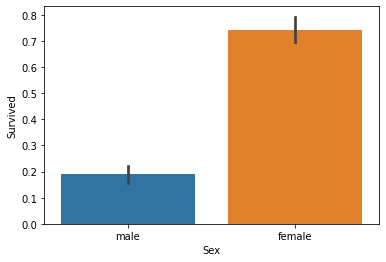

In [215]:
sns.barplot(data = dataset, x = 'Sex' , y = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

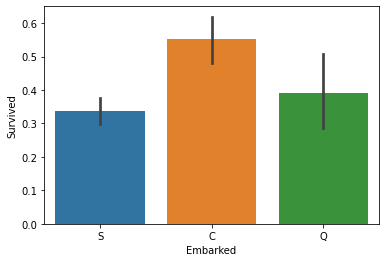

In [216]:
sns.barplot(data = dataset,x = 'Embarked',y = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

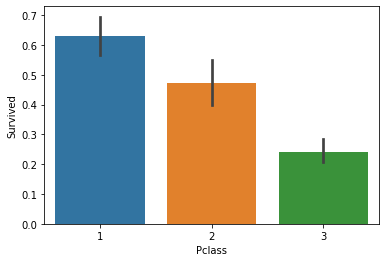

In [217]:
sns.barplot(data = dataset,x = 'Pclass',y = 'Survived')

In [218]:
RequiredFields = ['Survived','Pclass','Sex','Fare','Embarked']
dataset = dataset[RequiredFields]

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

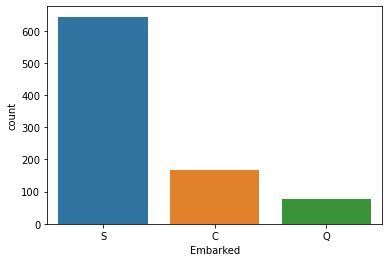

In [219]:
sns.countplot(dataset['Embarked'])

In [220]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [221]:
RequiredFields = ['PassengerId','Pclass','Sex','Fare','Embarked']
testset = testset[RequiredFields]
testset['Embarked'] = testset['Embarked'].fillna('S')
testset['Fare'] = testset['Fare'].replace(np.NaN,testset['Fare'].mean())
testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [222]:
dataset['Sex'].replace({'male':1,'female':0}, inplace = True)
dataset['Embarked'].replace({'S':1,'C':0,'Q':2}, inplace = True)
testset['Sex'].replace({'male':1,'female':0}, inplace = True)
testset['Embarked'].replace({'S':1,'C':0,'Q':2}, inplace = True)

In [223]:
dataset.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,1,7.2500,1
1,1,1,0,71.2833,0
2,1,3,0,7.9250,1
3,1,1,0,53.1000,1
4,0,3,1,8.0500,1


In [224]:
testset.head()

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,1,7.8292,2
1,893,3,0,7.0000,1
2,894,2,1,9.6875,2
3,895,3,1,8.6625,1
4,896,3,0,12.2875,1


In [225]:
dataset.describe()

,Survived,Pclass,Sex,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,32.204208,0.897868
std,0.486592,0.836071,0.477990,49.693429,0.514624
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,512.329200,2.000000


In [226]:
x = dataset.drop('Survived', axis=1)
y = dataset['Survived']

In [227]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=0)

In [228]:
#SVM Training and Testing
Model = svm.SVC(kernel = 'linear')
start = time.time()
Model.fit(train_x,train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [229]:
Accuracy = Model.score(test_x,test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  78.77 %


In [230]:
confusion_matrix(test_y,predict_y)

array([[92, 18],
       [20, 49]], dtype=int64)

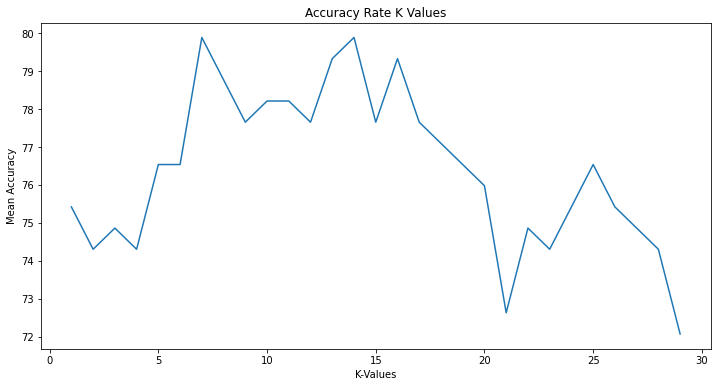

Maximum Accuracy:  79.88826815642457 at K = 7


In [231]:
acc = []
for k in range(1,30):
    Model = KNeighborsClassifier(k)
    Model.fit(train_x,train_y)
    predict_y = Model.predict(test_x)
    acc.append(Model.score(test_x,test_y)*100)
plt.figure(figsize=(12,6))
plt.plot(range(1,30),acc)
plt.title('Accuracy Rate K Values')
plt.xlabel('K-Values')
plt.ylabel('Mean Accuracy')
plt.show()
print("Maximum Accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

In [232]:
#KNN Training and Testing
Model = KNeighborsClassifier(7)  
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [233]:
Accuracy = Model.score(test_x,test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  79.89 %


In [234]:
confusion_matrix(test_y, predict_y)

array([[96, 14],
       [22, 47]], dtype=int64)

In [235]:
#Decision Tree Training and Testing
Model = DecisionTreeClassifier(max_depth=3)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [236]:
Accuracy = Model.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  79.89 %


In [237]:
confusion_matrix(test_y, predict_y)

array([[94, 16],
       [20, 49]], dtype=int64)

In [238]:
Model = MLPClassifier(random_state=1)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [239]:
Accuracy = Model.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  78.21 %


In [240]:
confusion_matrix(test_y, predict_y)

array([[91, 19],
       [20, 49]], dtype=int64)

In [241]:
Model = MLPClassifier(activation='tanh',solver='sgd',alpha=0.05,hidden_layer_sizes=(200,10),random_state=1)
start = time.time()
Model.fit(train_x, train_y)
end = time.time()
time_ = end - start
TrainTime.append(time_)
start = time.time()
predict_y = Model.predict(test_x)
end = time.time()
time_ = end - start
TestTime.append(time_)

In [242]:
Accuracy = Model.score(test_x, test_y)*100
print('Accuracy: ',"{:.2f}".format(Accuracy),'%')
Accuracy_List.append(Accuracy)

Accuracy:  78.21 %


In [243]:
confusion_matrix(test_y, predict_y)

array([[88, 22],
       [17, 52]], dtype=int64)

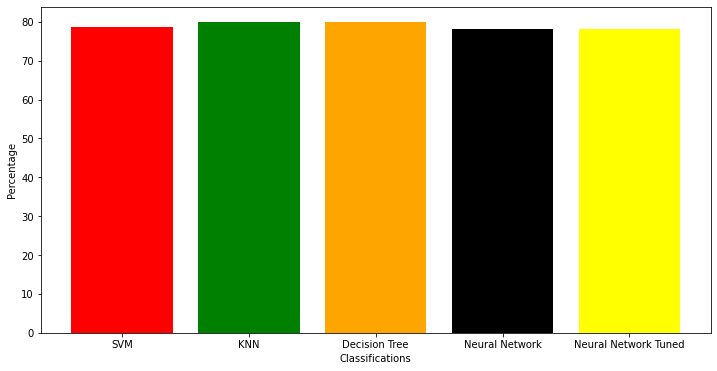

In [244]:
plt.figure(figsize=(12,6))
plt.bar(Algorithems,Accuracy_List, color=c)
plt.xlabel("Classifications")
plt.ylabel("Percentage")
plt.show()

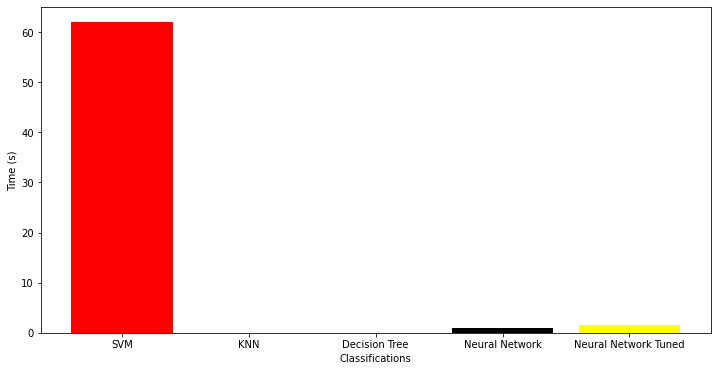

In [245]:
plt.figure(figsize=(12,6))
plt.bar(Algorithems,TrainTime, color=c)
plt.xlabel("Classifications")
plt.ylabel("Time (s)")
plt.show()

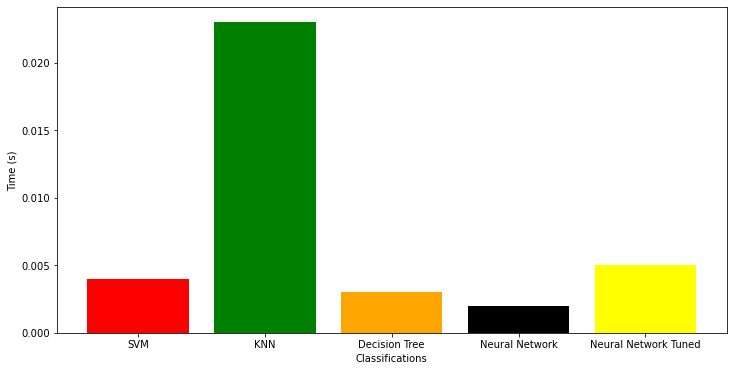

In [246]:
plt.figure(figsize=(12,6))
plt.bar(Algorithems,TestTime, color=c)
plt.xlabel("Classifications")
plt.ylabel("Time (s)")
plt.show()

In [248]:
result = pd.DataFrame({'Titles': Algorithems,
             'Accuracy (%)':Accuracy_List,
             'Train Time (s)': TrainTime,
             'Test Time (s)':TestTime})

In [249]:
result

,Titles,Accuracy (%),Train Time (s),Test Time (s)
0,SVM,78.770950,61.960281,0.003997
1,KNN,79.888268,0.010994,0.022987
2,Decision Tree,79.888268,0.003998,0.002998
3,Neural Network,78.212291,0.917475,0.001999
4,Neural Network Tuned,78.212291,1.547098,0.004997
